Environment Setup

In [1]:
import franka_env
import torch as th
import numpy as np
import gymnasium as gym
from stable_baselines3 import SAC,DDPG,HerReplayBuffer
from stable_baselines3.common.noise import NormalActionNoise
from sb3_contrib.tqc import TQC
from torchviz import make_dot
from IPython.display import display
from franka_env import EpisodeInfoCallback

Push Training(SAC)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


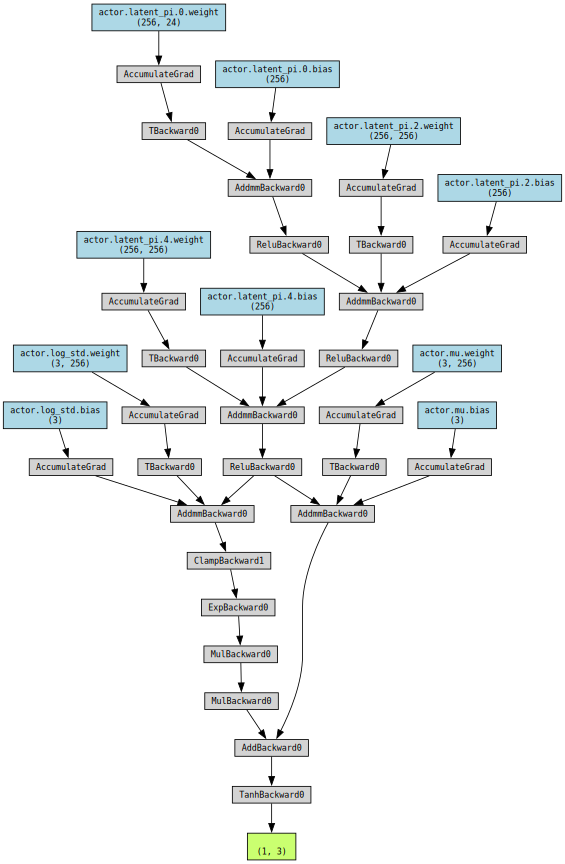

Logging to ./tensorboard/sac_push/SAC_6


d:\anaconda3\envs\rl_gpu\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.compute_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.compute_reward` for environment variables or `env.get_wrapper_attr('compute_reward')` that will search the reminding wrappers.
  logger.warn(


Target Object Position: [0.69712176 0.14211377 0.01995554]
Initial Object Position: [ 0.62250241 -0.29185565  0.01995638]
Final Object Position: [0.62857292 0.07090078 0.01995554]
Distance between Object and Target:0.09884
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 25       |
|    time_elapsed    | 7        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | -8.72    |
|    critic_loss     | 0.131    |
|    ent_coef        | 0.907    |
|    ent_coef_loss   | -0.494   |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [2]:
env = gym.make("FrankaPushSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# SAC agent
model = SAC(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6),
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/sac_push/", 
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/SAC_push.zip')

env.close()

Push Training(DDPG)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


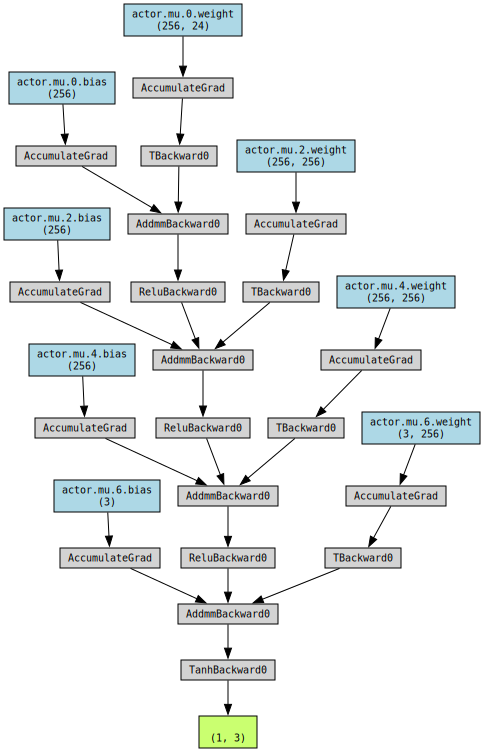

Logging to ./tensorboard/ddpg_push/DDPG_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.8     |
|    ep_rew_mean     | -37.5    |
|    success_rate    | 0.25     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 47       |
|    time_elapsed    | 3        |
|    total_timesteps | 151      |
| train/             |          |
|    actor_loss      | 0.505    |
|    critic_loss     | 0.153    |
|    learning_rate   | 0.001    |
|    n_updates       | 50       |
---------------------------------
Target Object Position: [ 0.70424774 -0.05898235  0.01995554]
Initial Object Position: [0.48356591 0.0242804  0.01995638]
Final Object Position: [0.48356591 0.0242804  0.01995638]
Distance between Object and Target:0.23587


In [3]:
env = gym.make("FrankaPushSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# DDPG agent
model = DDPG(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6), 
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/ddpg_push/",
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/DDPG_push.zip')

env.close()

Push Training(TQC)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


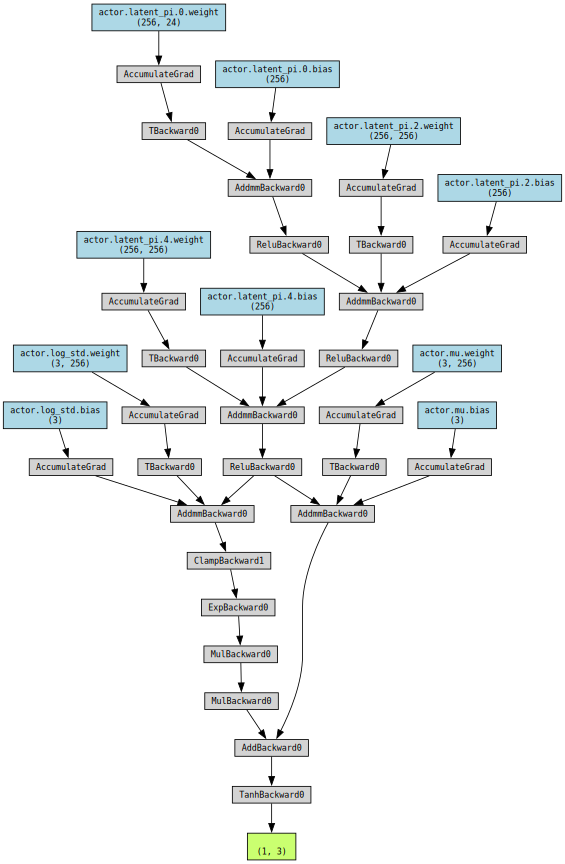

Logging to ./tensorboard/tqc_push/TQC_6
Target Object Position: [0.60592512 0.01373026 0.01995554]
Initial Object Position: [0.64156656 0.06857601 0.01995638]
Final Object Position: [ 0.73437485 -0.08928391  0.01995554]
Distance between Object and Target:0.16465
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 39       |
|    time_elapsed    | 5        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | -7.99    |
|    critic_loss     | 0.0494   |
|    ent_coef        | 0.907    |
|    ent_coef_loss   | -0.494   |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [4]:
env = gym.make("FrankaPushSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
    n_critics=2,
    n_quantiles=25,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# TQC agent
model = TQC(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6),
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/tqc_push/",
    
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/TQC_push.zip')

env.close()

Pick Training(SAC)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


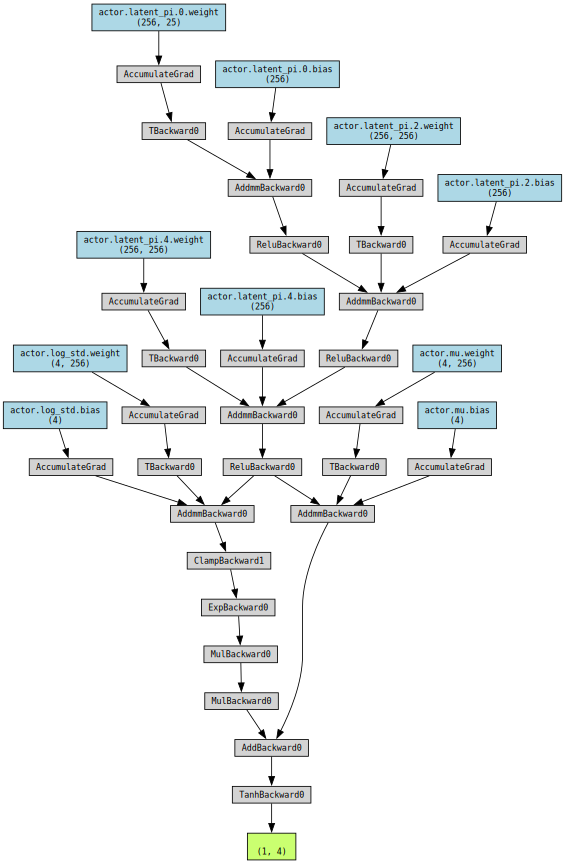

Logging to ./tensorboard/sac_pick/SAC_5
Target Object Position: [ 0.69640803 -0.0778781   0.19369614]
Initial Object Position: [ 0.68182889 -0.05072282  0.01995638]
Final Object Position: [ 0.53203138 -0.14821956  0.01995558]
Distance between Object and Target:0.24931
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 35       |
|    time_elapsed    | 5        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | -11.8    |
|    critic_loss     | 0.174    |
|    ent_coef        | 0.907    |
|    ent_coef_loss   | -0.66    |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [5]:
env = gym.make("FrankaPickSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# SAC agent
model = SAC(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6),
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/sac_pick/",
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/SAC_pick.zip')

env.close()

Pick Training(DDPG)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


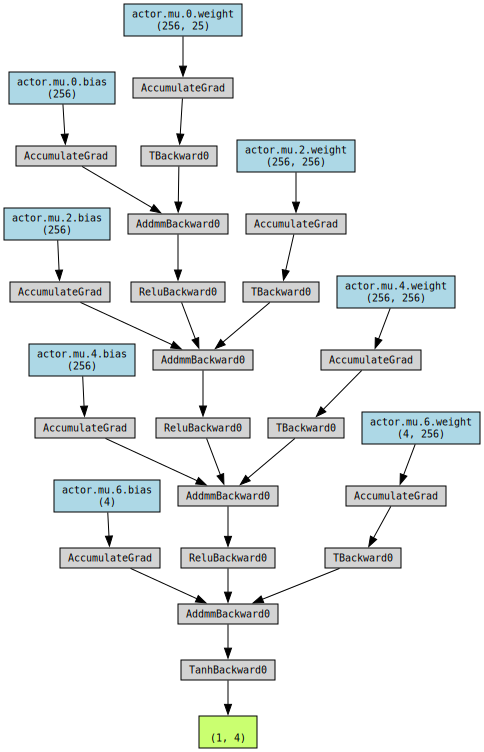

Logging to ./tensorboard/ddpg_pick/DDPG_5
Target Object Position: [0.73802766 0.07547847 0.01995558]
Initial Object Position: [ 0.74882877 -0.13991759  0.01995638]
Final Object Position: [ 0.69242208 -0.09779934  0.01995558]
Distance between Object and Target:0.17918
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 46       |
|    time_elapsed    | 4        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | 0.803    |
|    critic_loss     | 0.00517  |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [6]:
env = gym.make("FrankaPickSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# DDPG agent
model = DDPG(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6), 
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/ddpg_pick/",
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/DDPG_pick.zip')

env.close()

Pick Training(TQC)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


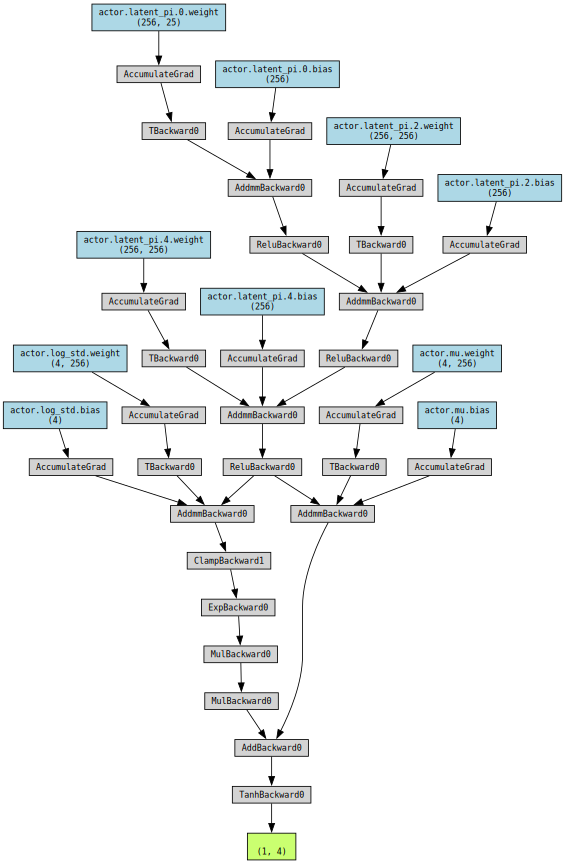

Logging to ./tensorboard/tqc_pick/TQC_5
Target Object Position: [ 0.5187206  -0.12273938  0.14718476]
Initial Object Position: [ 0.67863744 -0.02280065  0.01995638]
Final Object Position: [0.51142813 0.07955006 0.01995558]
Distance between Object and Target:0.23908
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.0601   |
|    ent_coef        | 0.907    |
|    ent_coef_loss   | -0.662   |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [7]:
env = gym.make("FrankaPickSparse", render_mode="human")

# Dimension of the action space
n_actions = env.action_space.shape[-1]

# Action noise
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

# Network architecture and optimizer parameters
policy_kwargs = dict(
    net_arch=[256, 256, 256],
    optimizer_class=th.optim.Adam,
    n_critics=2,
    n_quantiles=25,
)

# HER strategy
goal_selection_strategy = 'future'
n_sampled_goal = 4

# TQC agent
model = TQC(
    "MultiInputPolicy",
    env,
    policy_kwargs=policy_kwargs,
    action_noise=action_noise,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=n_sampled_goal,
        goal_selection_strategy=goal_selection_strategy,
    ),
    learning_rate=0.001,
    batch_size=512,
    buffer_size=int(1e6),
    tau=0.05,
    gamma=0.95,
    verbose=1,
    tensorboard_log="./tensorboard/tqc_pick/",
)

# Visualize the network
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model.policy.to(device)
obs, _ = env.reset()
sample_input = {key: th.tensor(value).float().unsqueeze(0).to(device) for key, value in obs.items()}
output = model.policy(sample_input)
dot = make_dot(output, params=dict(model.policy.named_parameters()))
display(dot)

# Start training
callback = EpisodeInfoCallback(env)
model.learn(total_timesteps=200, callback=callback)
model.save('model/TQC_pick.zip')

env.close()